In [48]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [49]:
data=pd.read_csv("baseball.csv")
df=pd.DataFrame(data)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


CONVERTING OUR TARGET COLUMN TO FLOAT AS OUR PROBLEM IS REGRESSION TYPE

In [50]:
df["W"]=df["W"].astype(float)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95.0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83.0,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81.0,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76.0,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74.0,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93.0,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87.0,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81.0,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80.0,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78.0,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


EDA PROCESS

In [51]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [52]:
df.dtypes

W      float64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [53]:
df.shape

(30, 17)

In [54]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:xlabel='W', ylabel='R'>

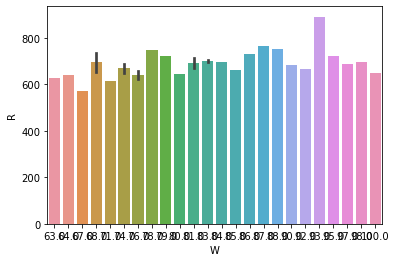

In [55]:
sns.barplot(x="W",y="R",data=df)

<AxesSubplot:xlabel='W', ylabel='HR'>

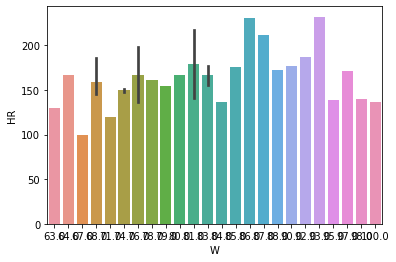

In [59]:
sns.barplot(x="W",y="HR",data=df)

<AxesSubplot:xlabel='W', ylabel='RA'>

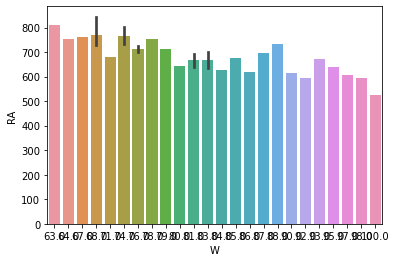

In [61]:
sns.barplot(x="W",y="RA",data=df)

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>,
        <AxesSubplot:title={'center':'E'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubp

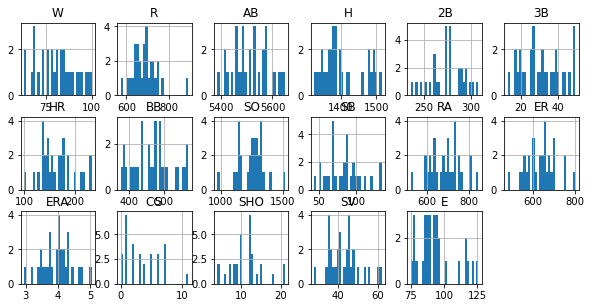

In [58]:
df.hist(figsize=(10,10),grid=True,layout=(6,6),bins=30)

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

W         AxesSubplot(0.125,0.749828;0.133621x0.130172)
R      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
AB      AxesSubplot(0.44569,0.749828;0.133621x0.130172)
H      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
2B     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
3B        AxesSubplot(0.125,0.593621;0.133621x0.130172)
HR     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
BB      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
SO     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
SB     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
RA        AxesSubplot(0.125,0.437414;0.133621x0.130172)
ER     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
ERA     AxesSubplot(0.44569,0.437414;0.133621x0.130172)
CG     AxesSubplot(0.606034,0.437414;0.133621x0.130172)
SHO    AxesSubplot(0.766379,0.437414;0.133621x0.130172)
SV        AxesSubplot(0.125,0.281207;0.133621x0.130172)
E      AxesSubplot(0.285345,0.281207;0.133621x0.130172)
dtype: object

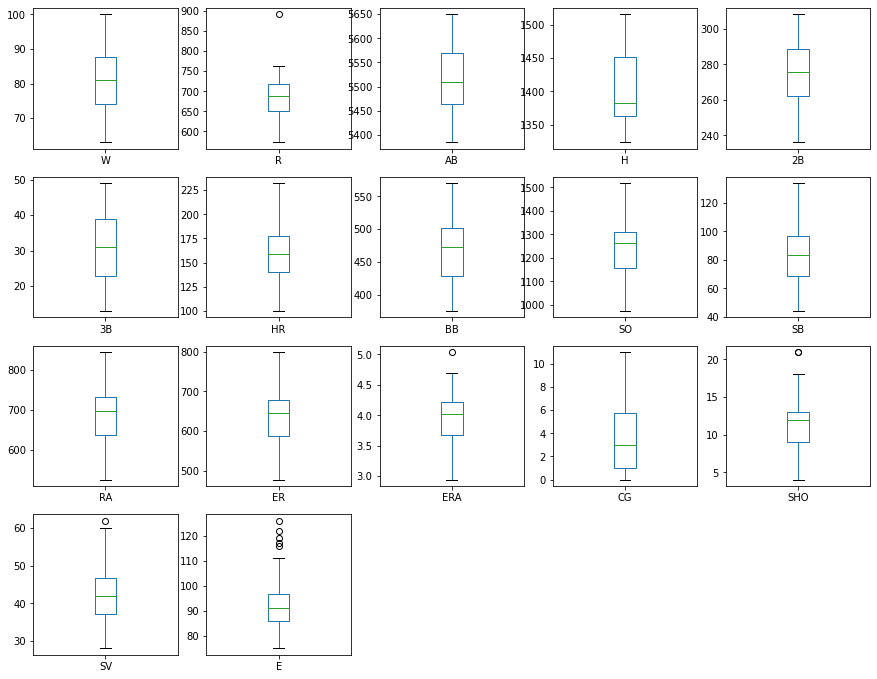

In [10]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

Z SCORE PROCESS TO REMOVE SKEWNESS

In [11]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [12]:
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95.0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83.0,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81.0,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76.0,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74.0,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87.0,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81.0,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80.0,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78.0,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88.0,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [13]:
df_new.shape

(29, 17)

In [14]:
29/30

0.9666666666666667

In [15]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

USING BOXCOX METHOD TO REMOVE SKEWNESS

In [16]:
df_new["CG"]=df_new["CG"].replace(0,1)
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95.0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83.0,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81.0,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76.0,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74.0,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87.0,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81.0,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,1,10,43,77
8,80.0,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78.0,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88.0,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [17]:
from scipy.stats import boxcox
df_new["CG"]=boxcox(df_new["CG"],0.5)

In [18]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.453175
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [19]:
from scipy.stats import boxcox
df_new["E"]=boxcox(df_new["E"],0)

In [20]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.453175
SHO    0.526943
SV     0.627480
E      0.583308
dtype: float64

In [21]:
from scipy.stats import boxcox
df_new["H"]=boxcox(df_new["H"],0)

In [22]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738423
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.453175
SHO    0.526943
SV     0.627480
E      0.583308
dtype: float64

In [23]:
from scipy.stats import boxcox
df_new["SV"]=boxcox(df_new["SV"],0.5)

In [24]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738423
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.453175
SHO    0.526943
SV     0.370280
E      0.583308
dtype: float64

In [25]:
from scipy.stats import boxcox
df_new["SHO"]=boxcox(df_new["SHO"],0.5)

In [26]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738423
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.453175
SHO   -0.085802
SV     0.370280
E      0.583308
dtype: float64

CORRELATION GRAPH

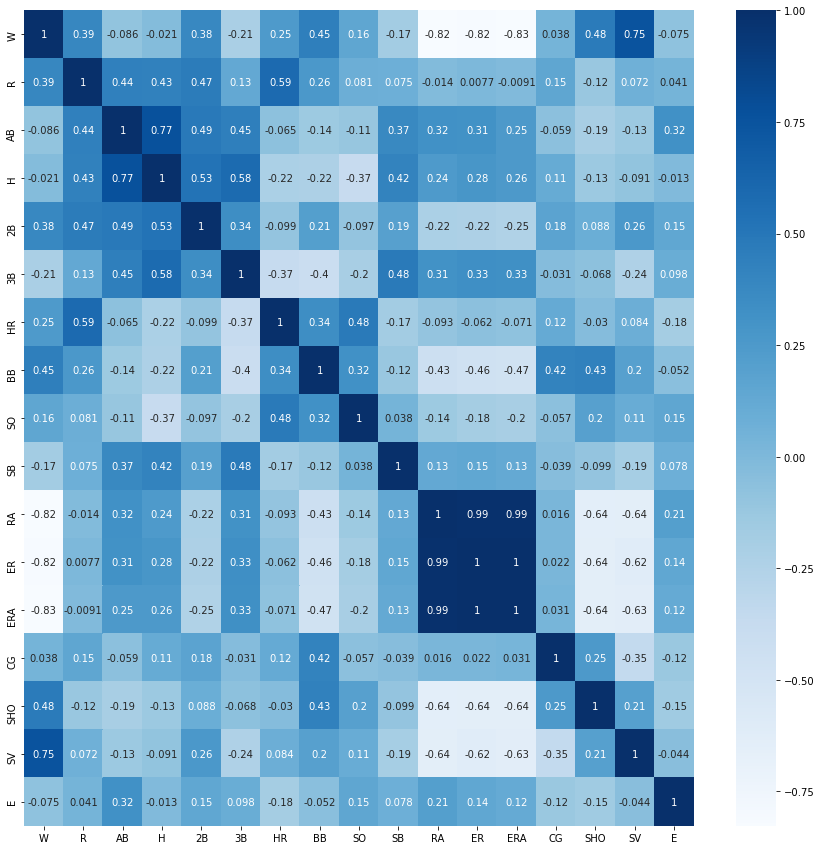

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_new.iloc[:,1:]
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,7.311218,300,42,139,383,973,104,641,601,3.73,0.828427,3.656854,12.966630,4.477337
1,696,5467,7.207119,277,44,156,439,1264,70,700,653,4.07,0.828427,4.928203,11.416408,4.454347
2,669,5439,7.240650,303,29,141,533,1157,86,640,584,3.67,4.633250,4.324555,10.328828,4.369448
3,622,5533,7.230563,260,27,136,404,1231,68,701,643,3.98,3.291503,4.000000,10.165525,4.615121
4,689,5605,7.323171,289,49,151,455,1259,83,803,746,4.64,3.291503,4.928203,9.832160,4.454347
6,764,5567,7.242082,272,19,212,554,1227,63,698,652,4.03,1.464102,2.000000,11.856406,4.532599
7,713,5485,7.222566,246,20,217,418,1331,44,693,646,4.05,0.000000,4.324555,11.114877,4.343805
8,644,5485,7.232010,278,32,167,436,1310,87,642,604,3.74,0.000000,4.928203,13.491933,4.553877
9,748,5640,7.309881,294,33,161,478,1148,71,753,694,4.31,1.464102,4.324555,10.649111,4.574711
10,751,5511,7.257708,279,32,172,503,1233,101,733,680,4.24,2.472136,4.000000,11.416408,4.779123


In [29]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [30]:
calc_vif(x)

,variable,VIF factor
0,R,1068.372308
1,AB,112889.536494
2,H,104331.920096
3,2B,823.227916
4,3B,33.948070
5,HR,188.766544
6,BB,215.618042
7,SO,406.941340
8,SB,26.932053
9,RA,16780.744244


In [31]:
df_new.drop(["AB","H","ER","ERA","RA"],axis=1,inplace=True)

In [32]:
x=df_new.iloc[:,1:]
x

,R,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,724,300,42,139,383,973,104,0.828427,3.656854,12.966630,4.477337
1,696,277,44,156,439,1264,70,0.828427,4.928203,11.416408,4.454347
2,669,303,29,141,533,1157,86,4.633250,4.324555,10.328828,4.369448
3,622,260,27,136,404,1231,68,3.291503,4.000000,10.165525,4.615121
4,689,289,49,151,455,1259,83,3.291503,4.928203,9.832160,4.454347
6,764,272,19,212,554,1227,63,1.464102,2.000000,11.856406,4.532599
7,713,246,20,217,418,1331,44,0.000000,4.324555,11.114877,4.343805
8,644,278,32,167,436,1310,87,0.000000,4.928203,13.491933,4.553877
9,748,294,33,161,478,1148,71,1.464102,4.324555,10.649111,4.574711
10,751,279,32,172,503,1233,101,2.472136,4.000000,11.416408,4.779123


In [33]:
calc_vif(x)

,variable,VIF factor
0,R,928.905736
1,2B,634.826623
2,3B,28.197389
3,HR,146.959566
4,BB,186.786169
5,SO,316.914803
6,SB,20.314406
7,CG,4.174040
8,SHO,23.549474
9,SV,170.608960


STANDARD SCALER METHOD

In [34]:
from sklearn.preprocessing import StandardScaler          #making all column_data into a single scale
scale=StandardScaler()                                    #makes mean=0,std=1 thus model can learn more efficiently
x=scale.fit_transform(x)
x.shape

(29, 11)

In [35]:
y=df_new.iloc[:,-1]
y.shape

(29,)

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [36]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=LinearRegression()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 1.0 on random state 1


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [38]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",r2_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    mse=mean_squared_error(pred_test,y_test)
    rmse=math.sqrt(mse)
    print("error=",rmse,"\n")

testing score= 1.0
training score= 1.0
error= 0.0 

testing score= 0.9212297180737461
training score= 1.0
error= 0.03231994269609814 

testing score= -7.963547941150983
training score= 0.6965709983403646
error= 0.11175954539445654 

testing score= 0.8312419415513846
training score= 0.9870408690549858
error= 0.0395903746158486 

testing score= -3.158250138863516
training score= 0.5744735285259253
error= 0.11847542102079653 



CROSS VALIDATION PROCESS

In [39]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [1. 1. 1. 1. 1.]
mean_score= 1.0
std= 0.0 

score= [0.7479774  0.95645964 0.88102977 0.90619564 0.92212329]
mean_score= 0.8827571459268719
std= 0.07169334453911841 

score= [-0.30720718  0.29005709 -1.17186667  0.20017869 -1.28411195]
mean_score= -0.4545900067890041
std= 0.6644600066838083 

score= [0.83734508 0.98284813 0.65275453 0.95924236 0.7910488 ]
mean_score= 0.8446477778388723
std= 0.11998371084806853 

score= [-0.07513275  0.40285846 -1.23530175  0.05283294 -0.73512101]
mean_score= -0.3179728207555212
std= 0.5884846497316623 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameters={"fit_intercept":[True,False],"normalize":[True,False],"n_jobs": np.arange(2,10),"copy_X":[True,False]}

In [42]:
gcv=GridSearchCV(LinearRegression(),parameters,cv=5)

In [43]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'normalize': [True, False]})

In [44]:
gcv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'normalize': True}

In [45]:
final_model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=True)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

1.0
score= 1.0
0.0


SAVING THE BEST MODEL

In [46]:
import joblib

joblib.dump(final_model,"baseballfile.obj")

['baseballfile.obj']

In [47]:
baseballfile_from_joblib=joblib.load("baseballfile.obj")
baseballfile_from_joblib.predict(x_test)

array([4.56434819, 4.34380542, 4.49980967, 4.49980967, 4.35670883,
       4.47733681, 4.61512052, 4.44265126, 4.76217393])